# 4.1

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from icecream import ic
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm.notebook import tqdm
import copy

# Random Forest Classifier

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier  

class RandomForestClassifier:
    def __init__(self, n_estimators=10, bootstrap = False, fraction=1.0):
        self.n_estimators = n_estimators
        self.fraction = fraction
        self.models = []
        self.bootstrap = bootstrap

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling with fraction
            indices = np.random.choice(len(X), int(self.fraction * len(X)), replace=self.bootstrap)
            X_bootstrap, y_bootstrap = X[indices], y[indices]

            # Train a decision tree on the bootstrap sample
            tree = DecisionTreeClassifier()
            tree.fit(X_bootstrap, y_bootstrap)
            self.models.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = [tree.predict(X) for tree in self.models]
        # predictions = np.array(predictions)
        # print(predictions.shape)
        # print(predictions)
        # print(np.mean(predictions, axis=0))
        # Use majority voting for classification
        return np.mean(predictions, axis=0)

In [70]:
PATH_TO_WINE_QT = "./Dataset/WineQT.csv"

df = pd.read_csv(PATH_TO_WINE_QT)

X = df.drop(columns=["quality", "Id"])
y = df.quality

scaler = StandardScaler()
X = scaler.fit_transform(X)
# set y to 0 if y <= 5, else 1
y = y.values

y[y <= 5] = 0
y[y > 5] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [71]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [72]:
# Train a Random Forest Classifier and Regressor along the same lines of
# the Bagging exercise (for decision tree) and report the best-performing
# hyper-parameters
best_acc = 0
best_model = None
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for bootstrap in [True, False]:
        for n_esimator in range(1, 11):
            rf = RandomForestClassifier(n_estimators=n_esimator, fraction=fraction, bootstrap=bootstrap)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_val)
            # print(predictions.shape)
            # print(y_val.shape)
            
            # print(predictions.shape)
            predictions[predictions <= 0.5] = 0
            predictions[predictions > 0.5] = 1
            # print(y_val.shape)
            score = accuracy_score(y_true = y_val, y_pred = predictions)
            # print(score)
            if score > best_acc:
                best_acc = score
                best_model = copy.deepcopy(rf)
                # print(f"Fraction: {fraction}, Bootstrap: {bootstrap}, n_estimators: {n_esimator}, Score: {score}")
            # print(f"Fraction: {fraction}, Bootstrap: {bootstrap}, n_estimators: {n_esimator}, Score: {score}")
print(f"Fraction : {best_model.fraction}, Bootstrap : {best_model.bootstrap}, n_estimators : {best_model.n_estimators}, Accuracy : {best_acc}")

Fraction : 0.5, Bootstrap : True, n_estimators : 9, Accuracy : 0.7913043478260869


# Random Tree Regressor

In [36]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class RandomForestRegressor:
    def __init__(self, n_estimators=10, bootstrap = False, fraction=1.0, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.models = []
        self.fraction = fraction
        self.bootstrap = bootstrap

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling with fraction
            indices = np.random.choice(len(X), int(self.fraction * len(X)), replace=self.bootstrap)
            X_bootstrap, y_bootstrap = X[indices], y[indices]

            # Train a decision tree on the bootstrap sample
            tree = DecisionTreeRegressor()
            tree.fit(X_bootstrap, y_bootstrap)
            self.models.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = np.array([tree.predict(X) for tree in self.models])
        return np.mean(predictions, axis=0)


In [74]:
PATH_TO_BOSTON_HOUSING_DATASET = "./Dataset/HousingData.csv"
df = pd.read_csv(PATH_TO_BOSTON_HOUSING_DATASET)
df["CHAS"] = df.CHAS.fillna(df.CHAS.mode()[0])
df = df.fillna(df.mean())
# standardize the data except the target column 'MEDV' and "CHAS"
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['MEDV', 'CHAS'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(["CHAS", "MEDV"], axis=1).columns)
df_scaled["CHAS"] = df["CHAS"]
X = df_scaled.values
y = df["MEDV"].values

# split into train test and validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# y_test = y_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)

In [77]:
# Train a Random Forest Classifier and Regressor along the same lines of
# the Bagging exercise (for decision tree) and report the best-performing
# hyper-parameters
best_mse = float("inf")
best_model = None
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for bootstrap in [True, False]:
        for n_esimator in range(1, 11):
            rf = RandomForestRegressor(n_estimators=n_esimator, fraction=fraction, bootstrap=bootstrap)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_val)
            # print(predictions.shape)
            # print(y_val.shape)
            score = mean_squared_error(y_true = y_val, y_pred = predictions)
            if score < best_mse:
                best_mse = score
                best_model = copy.deepcopy(rf)
                # print(f"Fraction: {fraction}, Bootstrap: {bootstrap}, n_estimators: {n_esimator}, Score: {score}")
            # print(f"Fraction: {fraction}, Bootstrap: {bootstrap}, n_estimators: {n_esimator}, Score: {score}")
# print(best_model)
print(f"Fraction : {best_model.fraction}, Bootstrap : {best_model.bootstrap}, n_estimators : {best_model.n_estimators}, MSE : {best_mse}")

Fraction : 0.75, Bootstrap : False, n_estimators : 4, MSE : 7.796593137254901


# 4.2

In [7]:
PATH_TO_WINE_QT = "./Dataset/WineQT.csv"

df = pd.read_csv(PATH_TO_WINE_QT)

X = df.drop(columns=["quality", "Id"])
y = df.quality

scaler = StandardScaler()
X = scaler.fit_transform(X)
# set y to 0 if y <= 5, else 1
y = y.values

y[y <= 5] = 0
y[y > 5] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# AdaBoost Classifier

In [37]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            # Create a new decision tree with weighted samples
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)

            # Make predictions
            y_pred = model.predict(X)

            # Calculate weighted error
            err = np.sum(w * (y_pred != y)) / np.sum(w)

            # Avoid division by zero in alpha calculation
            if err == 0:
                alpha = 1
            elif err == 1:
                continue  # Skip this iteration if error is 1
            else:
                # Calculate alpha (classifier weight)
                alpha = 0.5 * np.log((1 - err) / err)

            # Update weights
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)

            # Save the model and alpha
            self.models.append(model)
            self.alphas.append(alpha)

    def predict(self, X):
        # Make predictions using all weak classifiers
        weak_preds = np.array([model.predict(X) for model in self.models])

        # Weighted sum of weak classifier predictions
        pred = np.sign(np.dot(self.alphas, weak_preds))

        # Convert predictions to binary (1 or -1)
        pred[pred <= 0] = -1
        pred[pred > 0] = 1

        return pred

# Example usage
adaboost = AdaBoost(n_estimators=100)
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)
y_pred[y_pred == -1] = 0
# Calculate accuracy
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy:", score)

Accuracy: 0.6666666666666666


# AdaBoost Regressor

In [38]:
PATH_TO_BOSTON_HOUSING_DATASET = "./Dataset/HousingData.csv"
df = pd.read_csv(PATH_TO_BOSTON_HOUSING_DATASET)
df["CHAS"] = df.CHAS.fillna(df.CHAS.mode()[0])
df = df.fillna(df.mean())
# standardize the data except the target column 'MEDV' and "CHAS"
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['MEDV', 'CHAS'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(["CHAS", "MEDV"], axis=1).columns)
df_scaled["CHAS"] = df["CHAS"]
X = df_scaled.values
y = df["MEDV"].values
# y = scaler.fit_transform(y.reshape(-1, 1))

# split into train test and validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# y_test = y_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)

In [10]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [39]:
from sklearn.tree import DecisionTreeRegressor

class AdaBoostRegressor:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators  # Number of weak learners

    def fit(self, X, y):
        self.models = []
        self.betas = []

        N, _ = X.shape
        w = np.ones(N) / N  # Initialize weights

        for m in range(self.n_estimators):
            # Fit a regressor with the specific weights
            model = DecisionTreeRegressor(max_depth=1, random_state=42)
            model.fit(X, y, sample_weight=w)
            predictions = model.predict(X)

            # Compute absolute errors
            error = np.abs(predictions - y)
            
            error = error / np.max(error)

            # Avoid division by zero
            avg_error = np.sum(w * error)
            
            # Calculate beta
            beta = avg_error / (1.0 - avg_error)
            
            # Ensure beta is not equal to zero
            beta = max(1e-10, beta)

            # Store model and beta
            self.models.append(model)
            self.betas.append(beta)

            # Update weights
            w *= np.power(beta, 1 - error)
            # w /= np.sum(w)

    def predict(self, X):
        # Aggregate predictions from weak learners
        N, _ = X.shape
        agg_predictions = np.zeros(N)
        for model, beta in zip(self.models, self.betas):
            prediction = model.predict(X)
            agg_predictions += beta * prediction

        return agg_predictions / np.sum(self.betas)

# Assuming X_train, y_train, X_test, y_test are defined
adaboost_r = AdaBoostRegressor(n_estimators=50)
adaboost_r.fit(X_train, y_train)

y_pred = adaboost_r.predict(X_test)
print(mean_squared_error(y_test, y_pred))


53.2299468193514


# Gradient Boosting Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2s


In [41]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators, learning_rate, max_depth):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth

    def fit(self, X, y):
        # Initialize model with a simple average
        self.initial_model = np.mean(y)
        pred = np.full(y.shape, self.initial_model)

        self.trees = []

        for _ in range(self.n_estimators):
            # Compute residuals
            residuals = y - pred

            # Fit a tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            tree.fit(X, residuals)

            # Update pred
            pred = pred + self.learning_rate * tree.predict(X)

            # Store the tree
            self.trees.append(tree)

    def predict(self, X):
        # Start with the initial model
        pred = np.full(X.shape[0], self.initial_model)

        # Add pred from each tree
        for tree in self.trees:
            pred = pred + self.learning_rate * tree.predict(X)

        return pred

# Usage
n_estimators = 1000  # Number of trees
learning_rate = 0.01  # Learning rate
max_depth = 3  # Depth of each tree

model = GradientBoostingRegressor(n_estimators, learning_rate, max_depth)
model.fit(X_train, y_train)

pred = model.predict(X_val)
print("Validation MSE:", mse(y_val, pred))
print("Validation R2:", r2s(y_val, pred))

y_pred = model.predict(X_test)
print("Test MSE:", mse(y_test, y_pred))
print("Test R2:", r2s(y_test, y_pred))

Validation MSE: 8.787442537333778
Validation R2: 0.9075552721990373
Test MSE: 7.7258218263987395
Test R2: 0.9218977428644555


# Gradient Boosting Classifier

In [42]:
PATH_TO_WINE_QT = "./Dataset/WineQT.csv"

df = pd.read_csv(PATH_TO_WINE_QT)

X = df.drop(columns=["quality", "Id"])
y = df.quality

scaler = StandardScaler()
X = scaler.fit_transform(X)
# set y to 0 if y <= 5, else 1
y = y.values

y[y <= 5] = 0
y[y > 5] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [43]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import copy

class GradientBoostingClassifier:
    def __init__(self, num_estimators, learning_rate=0.1, max_depth=3):
        self.max_depth = max_depth 
        self.base_model = DecisionTreeClassifier(max_depth=self.max_depth)
        self.num_estimators = num_estimators
        self.learning_rate = learning_rate
        self.models = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for _ in range(self.num_estimators):
            residual = y - self.sigmoid(y_pred)
            model = copy.deepcopy(self.base_model)
            # print(type(residual))
            for i in range(len(residual)):
                if residual[i] <= 0:
                    residual[i] = 0
                else:
                    residual[i] = 1
            model.fit(X, residual)
            update = self.learning_rate * model.predict(X)
            y_pred += update

            self.models.append(model)

    def predict(self, X):
        # Initialize the sum
        total = 0
        # Loop over each model
        for model in self.models:
            # Add the prediction of the current model to the total
            total += self.learning_rate * model.predict(X)
        # Use the logistic function to get probabilities
        probabilities = self.sigmoid(total)
        # Convert probabilities to binary predictions
        predictions = np.where(probabilities > 0.5, 1, 0)
        return predictions

classifier = GradientBoostingClassifier(num_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6403508771929824


# Plot for Classification

In [44]:
import time

In [ ]:
PATH_TO_WINE_QT = "./Dataset/WineQT.csv"

df = pd.read_csv(PATH_TO_WINE_QT)

X = df.drop(columns=["quality", "Id"])
y = df.quality

scaler = StandardScaler()
X = scaler.fit_transform(X)
# set y to 0 if y <= 5, else 1
y = y.values

y[y <= 5] = 0
y[y > 5] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

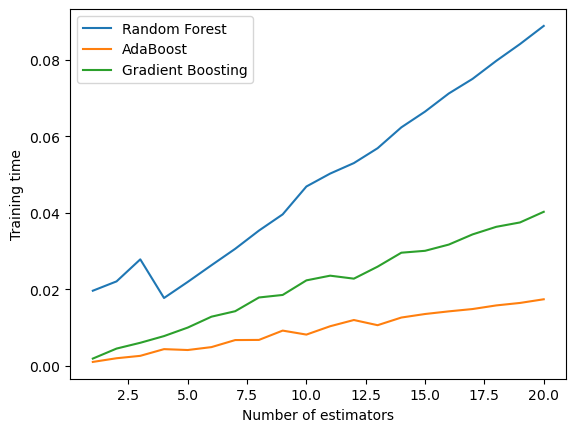

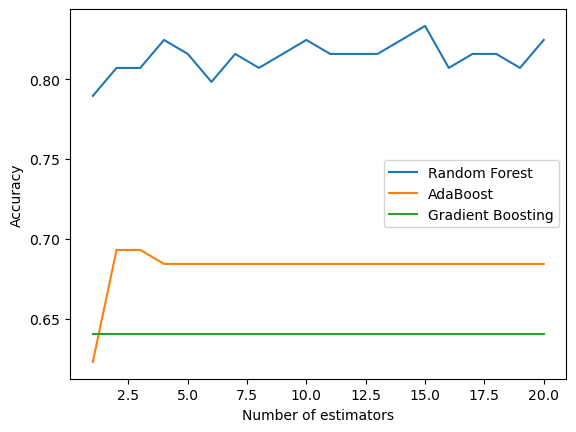

In [46]:
# Compare the results of the best Random Forest with the following Boosted
# Decision Trees. Also, experiment with the number of estimators and plot
# their training times and accuracies.
# •Decision Trees + AdaBoost
# •Gradient Boosted Decision Trees
rf_list_for_plotting = []
for n_estimators in range(1, 21):
    rf = RandomForestClassifier(n_estimators=n_estimators, fraction=1.0, bootstrap=False)
    start = time.time()
    rf.fit(X_train, y_train)
    end = time.time()
    y_pred = rf.predict(X_test)
    y_pred[y_pred <= 0.5] = 0
    y_pred[y_pred > 0.5] = 1
    score = accuracy_score(y_true = y_test, y_pred = y_pred)
    rf_list_for_plotting.append((n_estimators, end - start, score))
rf_list_for_plotting = np.array(rf_list_for_plotting)


adaboost_list_for_plotting = []
for n_estimators in range(1, 21):
    adaboost = AdaBoost(n_estimators=n_estimators)
    start = time.time()
    adaboost.fit(X_train, y_train)
    end = time.time()
    y_pred = adaboost.predict(X_test)
    y_pred[y_pred == -1] = 0
    score = accuracy_score(y_true = y_test, y_pred = y_pred)
    adaboost_list_for_plotting.append((n_estimators, end - start, score))
adaboost_list_for_plotting = np.array(adaboost_list_for_plotting)

gradient_boosting_list_for_plotting = []
for n_estimators in range(1, 21):
    gradient_boosting = GradientBoostingClassifier(num_estimators=n_estimators)
    start = time.time()
    gradient_boosting.fit(X_train, y_train)
    end = time.time()
    y_pred = gradient_boosting.predict(X_test)
    score = accuracy_score(y_true = y_test, y_pred = y_pred)
    gradient_boosting_list_for_plotting.append((n_estimators, end - start, score))
gradient_boosting_list_for_plotting = np.array(gradient_boosting_list_for_plotting)

plt.plot(rf_list_for_plotting[:, 0], rf_list_for_plotting[:, 1], label="Random Forest")
plt.plot(adaboost_list_for_plotting[:, 0], adaboost_list_for_plotting[:, 1], label="AdaBoost")
plt.plot(gradient_boosting_list_for_plotting[:, 0], gradient_boosting_list_for_plotting[:, 1], label="Gradient Boosting")
plt.xlabel("Number of estimators")
plt.ylabel("Training time")
plt.legend()
plt.show()

plt.plot(rf_list_for_plotting[:, 0], rf_list_for_plotting[:, 2], label="Random Forest")
plt.plot(adaboost_list_for_plotting[:, 0], adaboost_list_for_plotting[:, 2], label="AdaBoost")
plt.plot(gradient_boosting_list_for_plotting[:, 0], gradient_boosting_list_for_plotting[:, 2], label="Gradient Boosting")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot for Regression

In [47]:
PATH_TO_BOSTON_HOUSING_DATASET = "./Dataset/HousingData.csv"
df = pd.read_csv(PATH_TO_BOSTON_HOUSING_DATASET)
df["CHAS"] = df.CHAS.fillna(df.CHAS.mode()[0])
df = df.fillna(df.mean())
# standardize the data except the target column 'MEDV' and "CHAS"
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['MEDV', 'CHAS'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(["CHAS", "MEDV"], axis=1).columns)
df_scaled["CHAS"] = df["CHAS"]
X = df_scaled.values
y = df["MEDV"].values

# split into train test and validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# y_test = y_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)

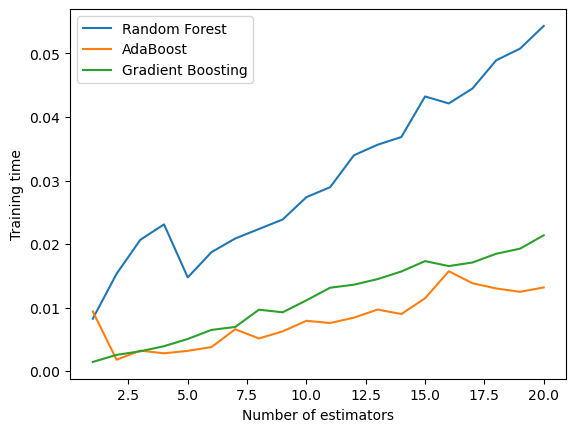

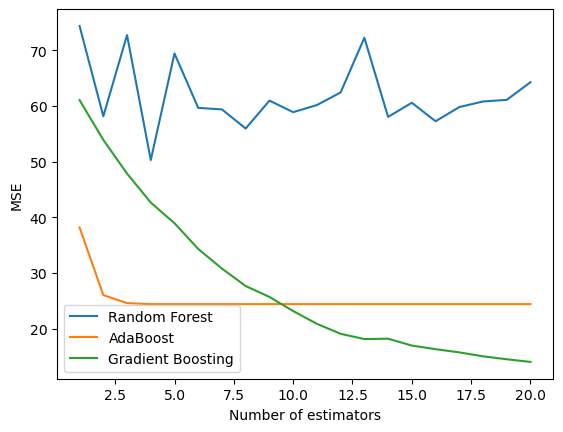

In [48]:
rf_list_for_plotting = []
for n_estimators in range(1, 21):
    rf = RandomForestRegressor(n_estimators=n_estimators, fraction=1.0, bootstrap=False)
    start = time.time()
    rf.fit(X_train, y_train)
    end = time.time()
    y_pred = rf.predict(X_test)
    score = mean_squared_error(y_true = y_test, y_pred = y_pred)
    rf_list_for_plotting.append((n_estimators, end - start, score))
rf_list_for_plotting = np.array(rf_list_for_plotting)

adaboost_list_for_plotting = []
for n_estimators in range(1, 21):
    adaboost = AdaBoostRegressor(n_estimators=n_estimators)
    start = time.time()
    adaboost.fit(X_train, y_train)
    end = time.time()
    y_pred = adaboost.predict(X_test)
    score = mean_squared_error(y_true = y_test, y_pred = y_pred)
    adaboost_list_for_plotting.append((n_estimators, end - start, score))
adaboost_list_for_plotting = np.array(adaboost_list_for_plotting)

gradient_boosting_list_for_plotting = []
for n_estimators in range(1, 21):
    gradient_boosting = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=0.1, max_depth=3)
    start = time.time()
    gradient_boosting.fit(X_train, y_train)
    end = time.time()
    y_pred = gradient_boosting.predict(X_test)
    score = mean_squared_error(y_true = y_test, y_pred = y_pred)
    gradient_boosting_list_for_plotting.append((n_estimators, end - start, score))
gradient_boosting_list_for_plotting = np.array(gradient_boosting_list_for_plotting)

plt.plot(rf_list_for_plotting[:, 0], rf_list_for_plotting[:, 1], label="Random Forest")
plt.plot(adaboost_list_for_plotting[:, 0], adaboost_list_for_plotting[:, 1], label="AdaBoost")
plt.plot(gradient_boosting_list_for_plotting[:, 0], gradient_boosting_list_for_plotting[:, 1], label="Gradient Boosting")
plt.xlabel("Number of estimators")
plt.ylabel("Training time")
plt.legend()
plt.show()

plt.plot(rf_list_for_plotting[:, 0], rf_list_for_plotting[:, 2], label="Random Forest")
plt.plot(adaboost_list_for_plotting[:, 0], adaboost_list_for_plotting[:, 2], label="AdaBoost")
plt.plot(gradient_boosting_list_for_plotting[:, 0], gradient_boosting_list_for_plotting[:, 2], label="Gradient Boosting")
plt.xlabel("Number of estimators")
plt.ylabel("MSE")
plt.legend()
plt.show()
    

## Common Mistakes:

### 1. Overfitting:

All three models can suffer from overfitting, especially when they have too many trees (or deep trees in the case of decision trees) in the ensemble. Overfitting occurs when the model learns the training data too well and performs poorly on unseen data.

### 2. Sensitivity to Noisy Data:

Random Forests and Gradient Boosted models can be sensitive to noisy data, as they may attempt to fit the noise in the training data. Decision Trees, especially if deep, can also be prone to overfitting noise.

### 3. Computational Complexity:

Gradient Boosted models, especially with a large number of trees, can be computationally expensive and might not be suitable for real-time applications. Decision Trees, if not pruned properly, can also be computationally intensive.

## Feature Similarities:

### 1. Ensemble Methods:

- RandomForest, Decision Tree + AdaBoost, and Gradient Boosted Decision Trees are all ensemble methods. They build multiple base models and combine their predictions to achieve better overall performance.

### 2. Tree-based Models:

- RandomForest and both variants of Decision Trees (with AdaBoost and Gradient Boosting) are based on decision trees. Decision trees are prone to capturing noise in the data and can be sensitive to outliers.

### 3. Bias-Variance Tradeoff:

- All three models need to strike a balance between bias and variance. Random Forests try to reduce variance by averaging over multiple trees, while AdaBoost and Gradient Boosting try to reduce bias by sequentially correcting errors made by previous models.

### 4. Non-linearity:

- Decision Trees, especially when deep, can capture non-linear relationships in the data. RandomForest and Gradient Boosted models can enhance this capability by combining multiple decision trees.

### 5. Feature Importance:

- Random Forests and Gradient Boosted models can provide insights into feature importance, helping to identify which features contribute most to the model's predictions.

Understanding the characteristics and potential pitfalls of these models will aid in selecting the appropriate model for a given task and in optimizing their performance.


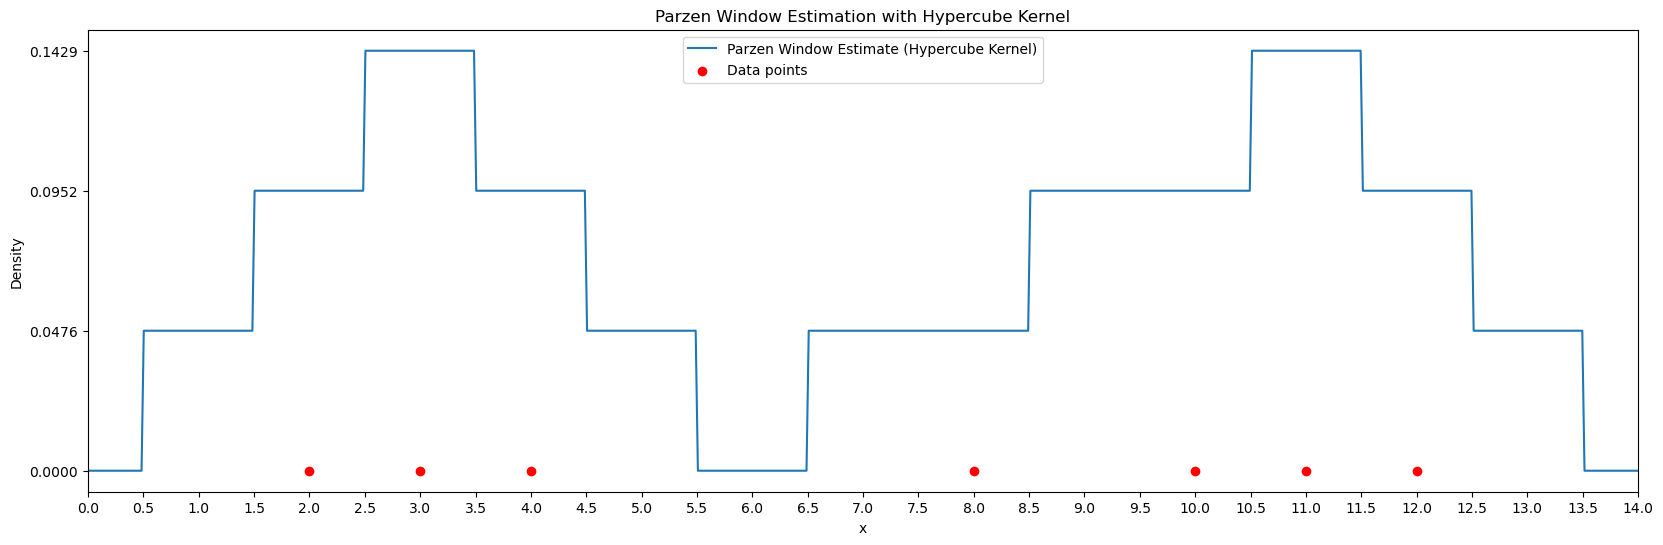

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 3
d = 1
n = 7
D = [2, 3, 4, 8, 10, 11, 12]

# Create a range of x values
x_values = np.linspace(min(D) - 5, max(D) + 5, 1000)

# Calculate the Parzen window estimate with a hypercube kernel
parzen_estimation = np.sum((1 / h) * ((np.abs(x_values - np.array(D)[:, np.newaxis]) / h) <= 0.5), axis=0) / n

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(x_values, parzen_estimation, label='Parzen Window Estimate (Hypercube Kernel)')
plt.scatter(D, np.zeros_like(D), color='red', label='Data points')
plt.title('Parzen Window Estimation with Hypercube Kernel')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
# plt.ylim(-0.1, 1.1)
plt.yticks(np.arange(0, max(parzen_estimation) + 1/21, 1/21))

# Add ticks at 0.5 intervals
plt.xticks(np.arange(min(x_values), max(x_values) + 0.5, 0.5))

plt.xlim(0 , 14)
plt.show()


In [12]:
import requests

def download_pdf(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as pdf_file:
        pdf_file.write(response.content)

if __name__ == "__main__":
    base_url = "http://cs231n.stanford.edu/slides/2023/lecture_"
    for i in range(2, 3):
        pdf_url = f"{base_url}{i}.pdf"
        destination = f"lecture_{i}.pdf"
        print(f"Downloading {pdf_url} to {destination}")
        download_pdf(pdf_url, destination)

    print("Download complete.")


Download complete.


In [11]:
import requests

def download_pdf(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as pdf_file:
        pdf_file.write(response.content)

if __name__ == "__main__":
    base_url = "http://cs231n.stanford.edu/slides/2023/lecture_1_part_"
    for i in range(1, 3):
        pdf_url = f"{base_url}{i}.pdf"
        destination = f"lecture_{i}.pdf"
        print(f"Downloading {pdf_url} to {destination}")
        download_pdf(pdf_url, destination)

    print("Download complete.")


Download complete.
